In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()

In [3]:
X = iris["data"][:, (2,3)] # petal_length, petal width
y = (iris["target"]==2).astype(np.float64) # Iris-Virginica

In [4]:
X[0]

array([1.4, 0.2])

In [5]:
y[0]

0.0

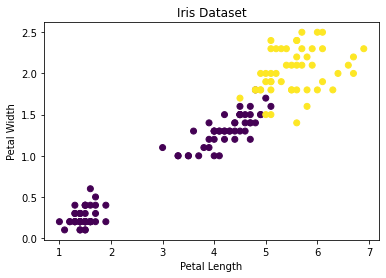

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:,0], X[:,1], c=y);
plt.title("Iris Dataset")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

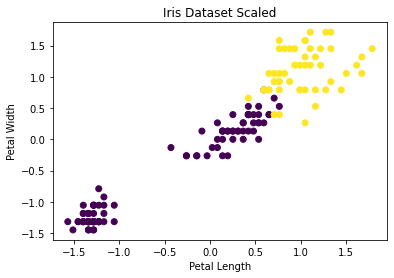

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y);
plt.title("Iris Dataset Scaled")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

In [9]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("Linear_svc", LinearSVC(C=1, loss="hinge"))
])
svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Linear_svc', LinearSVC(C=1, loss='hinge'))])

In [10]:
svm_clf.predict([X[0]])

array([0.])

In [11]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [12]:
X[0]

array([1.4, 0.2])

# Non Linear SVM Classification

> Although linear SVM classifiers are efficient and work suprisingly well in many cases, many datasets are not even close to being linearly separable.
> One Approach to handle nonlinear datasets is to add more featrures, such as polynomial features, in some cases this can result in a linearly separable dataset.
> To implement this idea using Scikit-Learn, we can create a Pipeline containing a PolynomialFeatures transformer, followed by a StandardScaler and LinearSVC.

In [29]:
# Let's test this on the moon_dataset.
import sklearn
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [31]:
X, y = sklearn.datasets.make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)


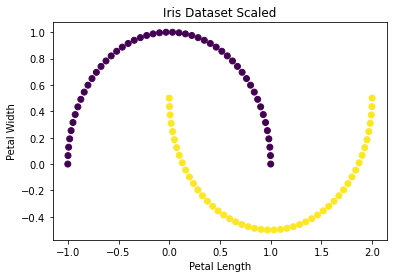

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:,0], X[:,1], c=y);
plt.title("Iris Dataset Scaled")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

In [37]:
polynomial_features = PolynomialFeatures(degree=3)
X_transform = polynomial_features.fit_transform(X)

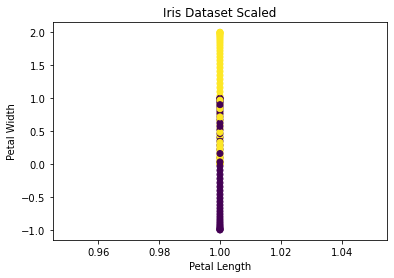

In [38]:
plt.scatter(X_transform[:,0], X_transform[:,1], c=y);
plt.title("Iris Dataset Scaled")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

In [41]:
X_scaled = scaler.fit_transform(X_transform)

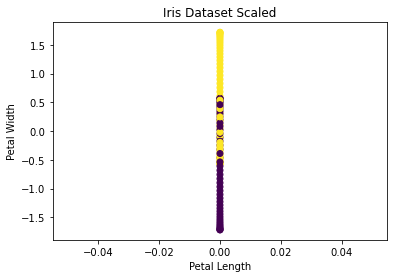

In [42]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y);
plt.title("Iris Dataset Scaled")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

In [45]:
svc = LinearSVC(C=10, loss="hinge")
svc.fit(X,y)

LinearSVC(C=10, loss='hinge')

In [46]:
y_preds = svc.predict(X)

In [50]:
from sklearn.metrics import f1_score

In [51]:
f1_score(y, y_preds)

0.88

In [52]:
svc2 = LinearSVC(C=1, loss="hinge")
svc2.fit(X,y)

LinearSVC(C=1, loss='hinge')

In [53]:
y_preds_2 = svc2.predict(X)
f1_score(y, y_preds_2)

0.8599999999999999

In [60]:
svc3 = LinearSVC(C=10, loss="hinge")
svc3.fit(X,y)

LinearSVC(C=10, loss='hinge')

In [59]:
y_preds_3 = svc3.predict(X)
f1_score(y, y_preds_3)

0.88

In [72]:
svc4 = LinearSVC(C=1, loss="hinge", max_iter=600000)
svc3.fit(X_scaled,y)

C:\Users\student\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=10, loss='hinge')

In [73]:
y_preds_4 = svc3.predict(X_scaled)
f1_score(y, y_preds_4)

1.0

# Polynomial Kernel

* Adding Polynomial features is simple to implement and can work great with all sorts of Machine Learning algorithms (not just SVMs)
* But a low polynomial degree cannot deal with complex datasets, and with a high polynomial degree it creates a huge number of features, making the model too slow.
* Fortunately, when using SVMs you can apply an almost miraculous msthematical technique called the `kernel trick` . 
> It makes it possible to get the same result as if you added many polynomial features, even with very high degree polynomial features, without actually having to add them

In [74]:
from sklearn.svm import SVC


poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [76]:
y_preds_poly_kernel = poly_kernel_svm_clf.predict(X)
f1_score(y, y_preds_poly_kernel)

1.0

# SVM Regression

* As we mentioned earlier, the SVM algorithm is quite versatile: not only does it support linear and nonlinear classification, but it also suppots linear and non-linear regression.
* The trick is to reverse the objective: instead of trying to fit the largest possible street between two classes while limiting margin violations, SVM Regression tries to fit as many instances as possible on the street while limiting margin violations (t.e, instances off the street)

In [77]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X,y)

LinearSVR(epsilon=1.5)

In [81]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X,y)

SVR(C=100, degree=2, kernel='poly')

# Trainan SVM regressor on the california housing dataset

In [85]:
import pandas as pd

housing = pd.read_csv("housing.csv")

In [86]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [87]:
housing.dropna(inplace=True)

In [89]:
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [90]:
X = housing.drop("median_income", axis=1)
y = housing["median_income"]

In [91]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,342200.0,NEAR BAY


In [93]:
X["ocean_proximity"].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [97]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

In [111]:
cat_features = ["ocean_proximity"]
one_hot = OneHotEncoder(handle_unknown="ignore")
one_hot = one_hot.fit_transform(X[cat_features])

In [115]:
dummy = pd.get_dummies(X["ocean_proximity"],  drop_first=True)

In [119]:
X.drop(["ocean_proximity"], axis=1, inplace=True)

In [121]:
dummy.columns

Index(['INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype='object')

In [122]:
X[dummy.columns] = dummy

In [123]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,342200.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,78100.0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,77100.0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,92300.0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,84700.0,1,0,0,0


In [127]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_new = pd.DataFrame(X_scaled, columns= X.columns)

In [128]:
X_new.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.128819,-0.682713,-0.015645,2.828661,-0.384186
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,1.313626,-0.682713,-0.015645,2.828661,-0.384186
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.258183,-0.682713,-0.015645,2.828661,-0.384186
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,1.164622,-0.682713,-0.015645,2.828661,-0.384186
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,1.172418,-0.682713,-0.015645,2.828661,-0.384186


In [129]:
from sklearn.svm import SVR

In [137]:
svr = SVR(epsilon=1.5)
svr.fit(X,y)

SVR(epsilon=1.5)

In [138]:
y_preds = svr.predict(X)

In [139]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_preds)
np.sqrt(mse)

1.3666587202915086

In [140]:
mse

1.8677560577488237